Practical No. 11 <br>
Title: Analyzing Air Quality Index (AQI) Trends in a City <br>
Name : Tavhare Ruchita Sharad <br>
Roll No : 61 <br>

Step No.1 - Import The Dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("city_day.csv")
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [5]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [7]:
df.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory
29530,Visakhapatnam,2020-07-01,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0,Good


Step No.2 - Explore the Structure and Content Of Dataset.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [11]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [13]:
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [17]:
df.dropna(inplace=True)
df.isnull().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [19]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

Step No.3 - Identify the relevant variables for visualizing AQI trends.

In [21]:
relevant_columns = ['Date', 'AQI', 'PM2.5', 'PM10', 'CO', 'NO2', 'SO2', 'O3']
relevant_columns

['Date', 'AQI', 'PM2.5', 'PM10', 'CO', 'NO2', 'SO2', 'O3']

In [23]:
# Identify the available relevant columns in the dataset
available_relevant_columns = [col for col in relevant_columns if col in df.columns]
available_relevant_columns

['Date', 'AQI', 'PM2.5', 'PM10', 'CO', 'NO2', 'SO2', 'O3']

In [29]:
if 'Date' in available_relevant_columns:
    df['Date'] = pd.to_datetime(df['Date'])
df[available_relevant_columns].head()

,Date,AQI,PM2.5,PM10,CO,NO2,SO2,O3
2123,2017-11-25,184.0,81.40,124.50,0.12,20.50,15.24,127.09
2124,2017-11-26,197.0,78.32,129.06,0.14,26.00,26.96,117.44
2125,2017-11-27,198.0,88.76,135.32,0.11,30.85,33.59,111.81
2126,2017-11-28,188.0,64.18,104.09,0.09,28.07,19.00,138.18
2127,2017-11-29,173.0,72.47,114.84,0.16,23.20,10.55,109.74


Step No.4 - Create line plots or time series plots to visualize the overall AQI trend over time.

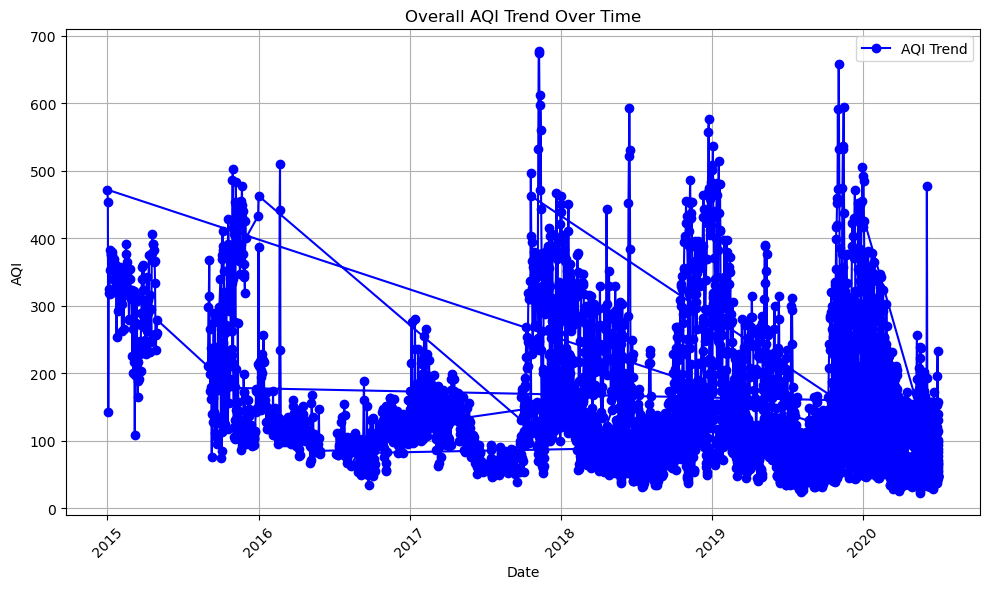

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['AQI'], marker='o', linestyle='-', color='b', label='AQI Trend')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('Overall AQI Trend Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Step No.5 - Plot individual pollutant levels over time

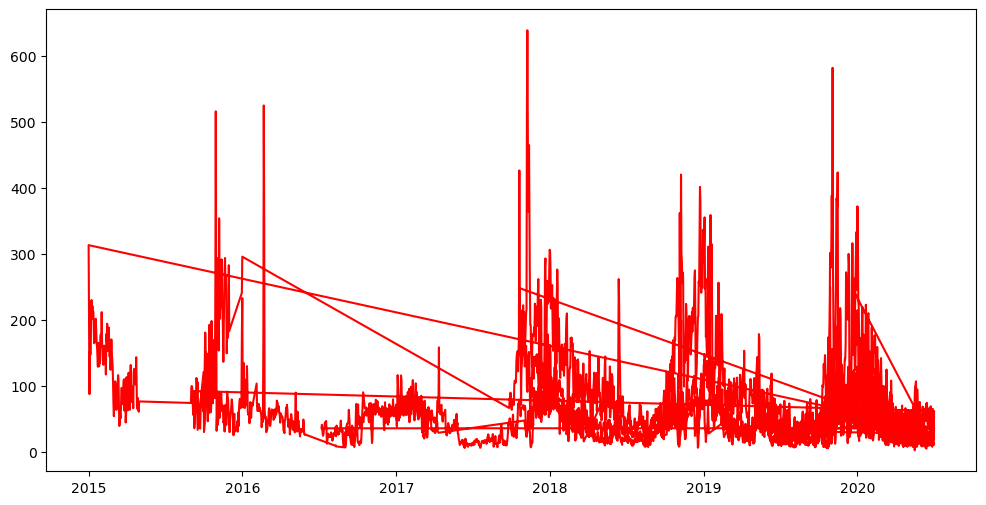

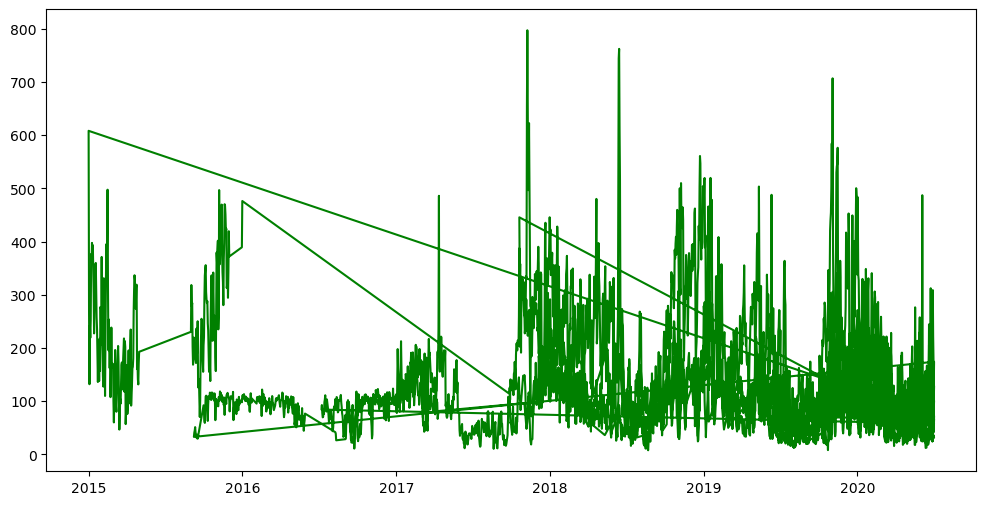

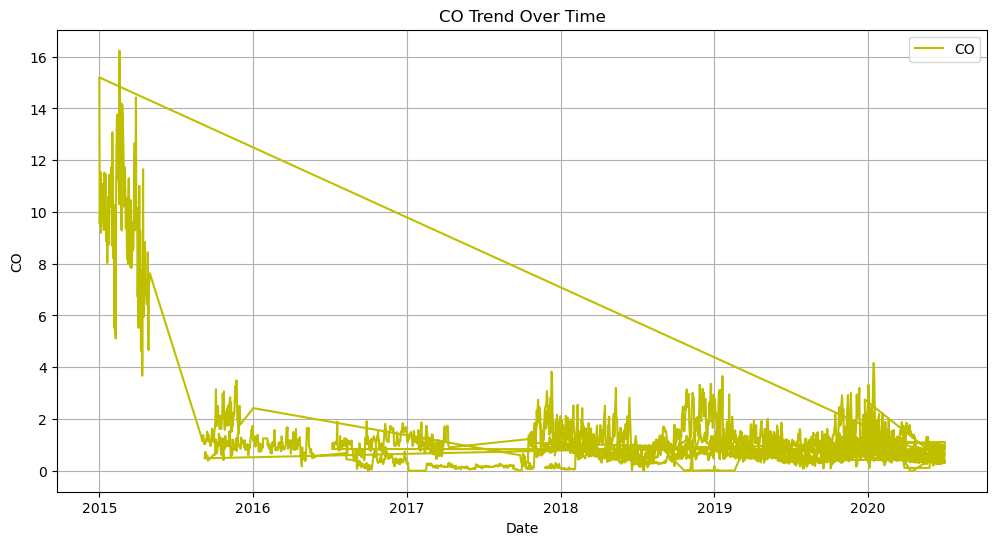

In [37]:
pollutants = ['PM2.5', 'PM10', 'CO']
for pollutant in pollutants:
    plt.figure(figsize=(12, 6))
    plt.plot(df['Date'], df[pollutant], label=pollutant, color='r' if pollutant == 'PM2.5' else 'g' if
pollutant == 'PM10' else 'y')
plt.xlabel('Date')
plt.ylabel(pollutant)
plt.title(f'{pollutant} Trend Over Time')
plt.legend()
plt.grid(True)
plt.show()

Step No. 6 - Use bar plots or stacked bar plots to compare the AQI values across different dates or time periods.

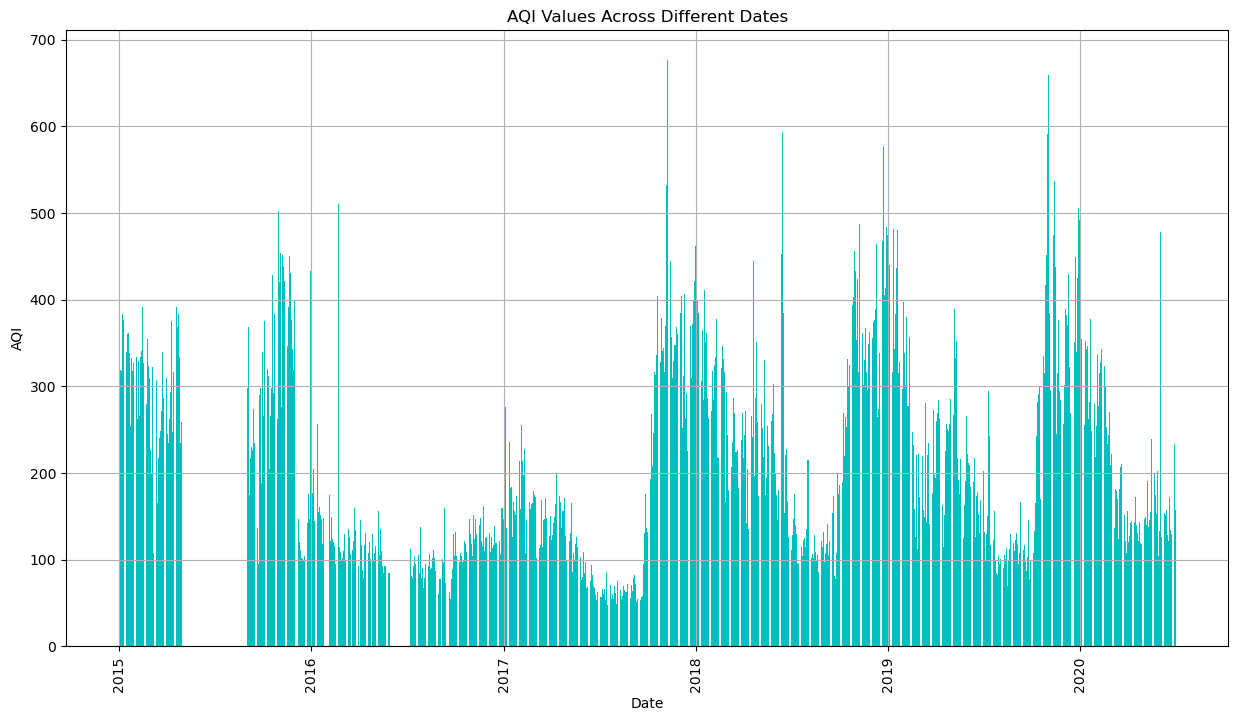

In [40]:
# Plot bar plot for AQI values across different dates
plt.figure(figsize=(15, 8))
plt.bar(df['Date'], df['AQI'], color='c')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('AQI Values Across Different Dates')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

C:\Users\ruchi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


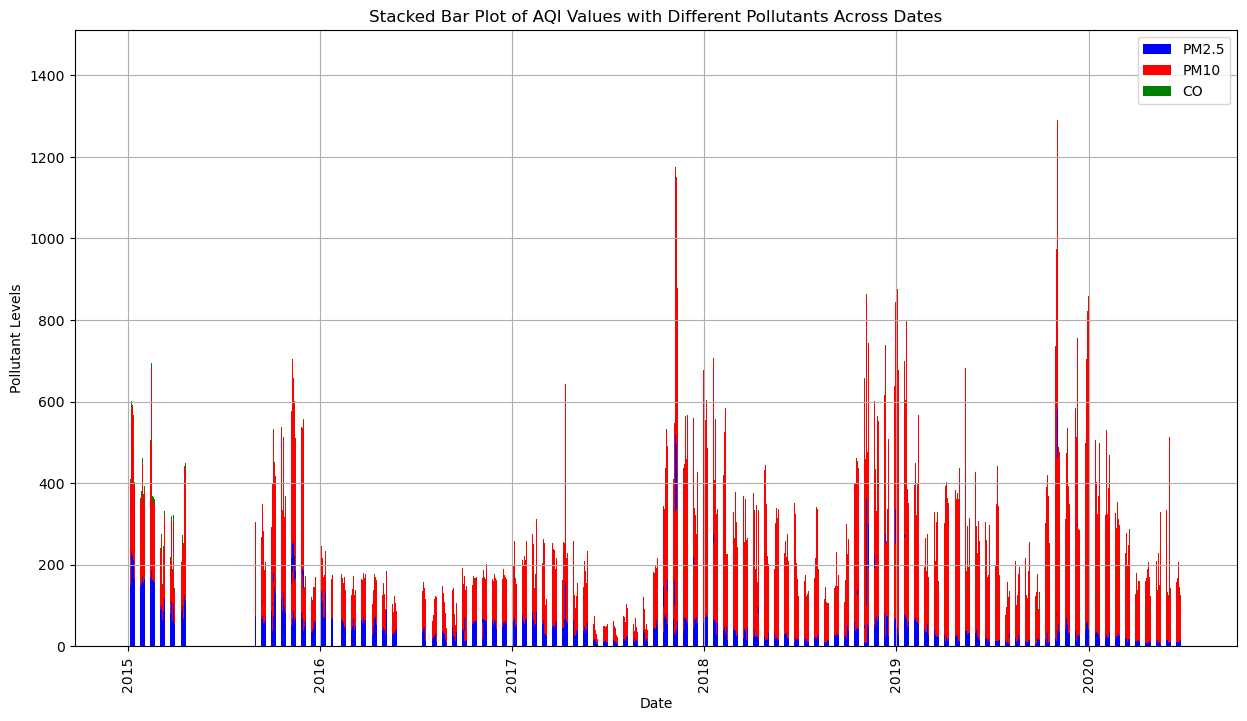

In [43]:
# Plot stacked bar plot for AQI values with different pollutants
plt.figure(figsize=(15, 8))
bar_width = 0.5
plt.bar(df['Date'], df['PM2.5'], label='PM2.5', color='b', width=bar_width)
plt.bar(df['Date'], df['PM10'], bottom=df['PM2.5'], label='PM10', color='r', width=bar_width)
plt.bar(df['Date'], df['CO'], bottom=df['PM2.5'] + df['PM10'], label='CO', color='g',width=bar_width)
plt.xlabel('Date')
plt.ylabel('Pollutant Levels')
plt.title('Stacked Bar Plot of AQI Values with Different Pollutants Across Dates')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()

Step No. 7 - Create box plots or violin plots to analyze the distribution of AQI values for
different pollutant categories.

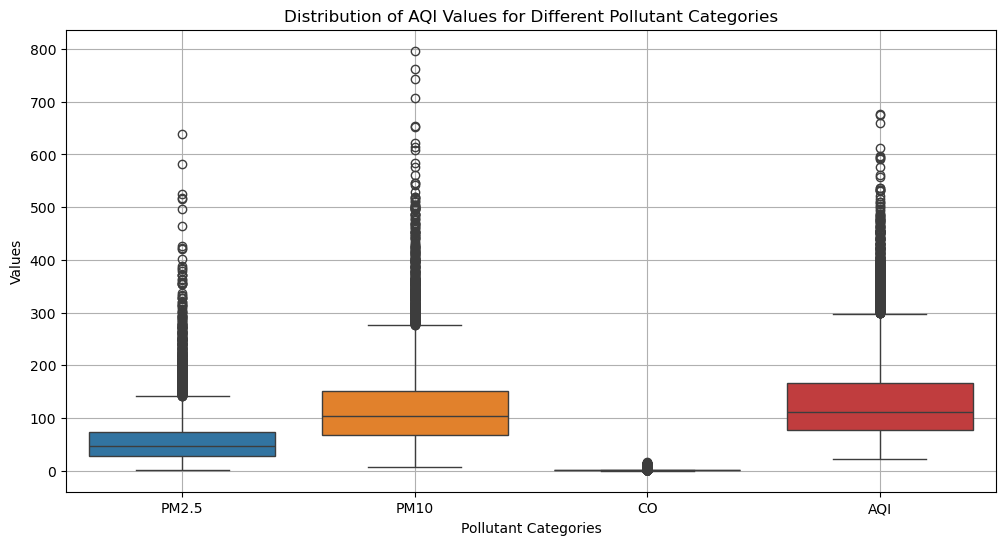

In [46]:
# Create box plot for AQI values by pollutant categories
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['PM2.5', 'PM10', 'CO', 'AQI']])
plt.xlabel('Pollutant Categories')
plt.ylabel('Values')
plt.title('Distribution of AQI Values for Different Pollutant Categories')
plt.grid(True)
plt.show()

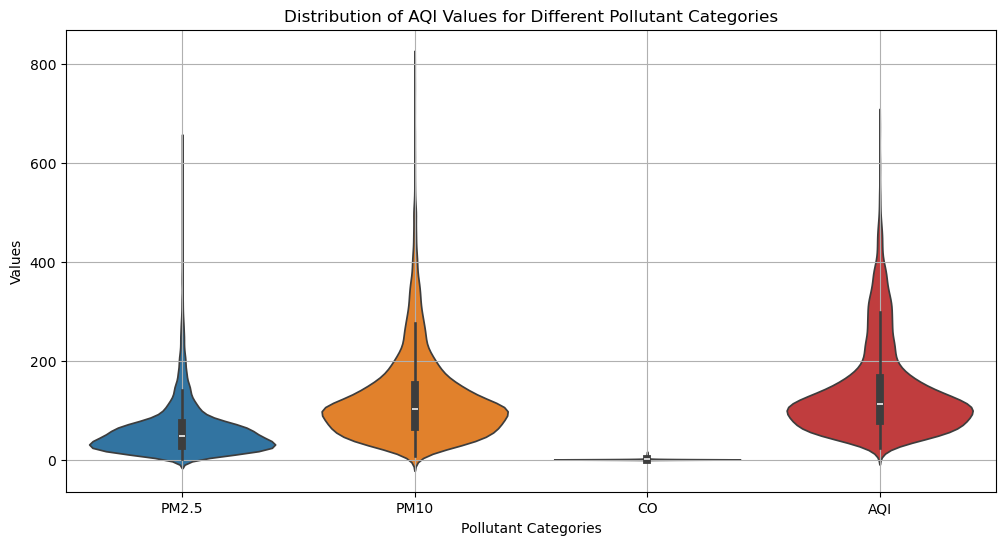

In [48]:
# Create violin plot for AQI values by pollutant categories
plt.figure(figsize=(12, 6))
sns.violinplot(data=df[['PM2.5', 'PM10', 'CO', 'AQI']])
plt.xlabel('Pollutant Categories')
plt.ylabel('Values')
plt.title('Distribution of AQI Values for Different Pollutant Categories')
plt.grid(True)
plt.show()

Step No. 8 - Use scatter plots or bubble charts to explore the relationship between AQI
values and pollutant levels.

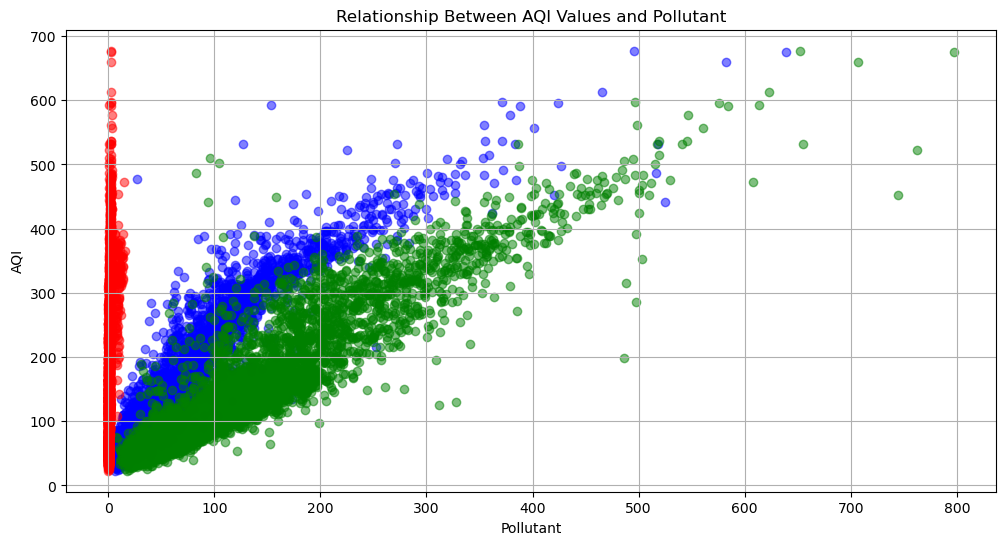

In [51]:
# Scatter plot for AQI values vs. Pollutants
plt.figure(figsize=(12, 6))
plt.scatter(df['PM2.5'], df['AQI'], alpha=0.5, color='b')
plt.scatter(df['PM10'], df['AQI'], alpha=0.5, color='g')
plt.scatter(df['CO'], df['AQI'], alpha=0.5, color='r')
plt.xlabel('Pollutant')
plt.ylabel('AQI')
plt.title('Relationship Between AQI Values and Pollutant')
plt.grid(True)
plt.show()

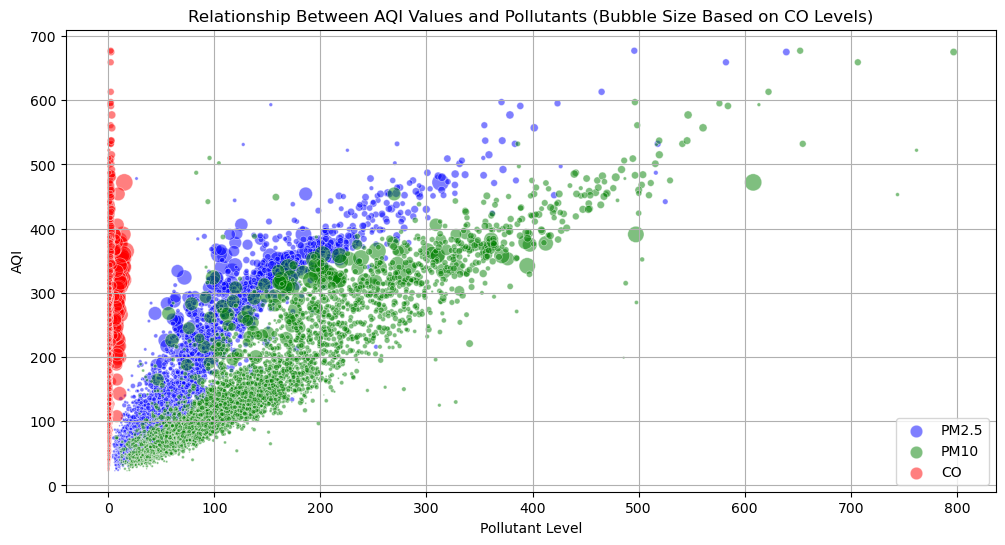

In [65]:
plt.figure(figsize=(12, 6))
plt.scatter(df['PM2.5'], df['AQI'], s=df['CO']*10, alpha=0.5, color='b', edgecolors='w',linewidth=0.5, label='PM2.5')
plt.scatter(df['PM10'], df['AQI'], s=df['CO']*10, alpha=0.5, color='g', edgecolors='w',linewidth=0.5, label='PM10')
plt.scatter(df['CO'], df['AQI'], s=df['CO']*10, alpha=0.5, color='r', edgecolors='w',linewidth=0.5, label='CO')
plt.xlabel('Pollutant Level')
plt.ylabel('AQI')
plt.title('Relationship Between AQI Values and Pollutants (Bubble Size Based on CO Levels)')
plt.legend(loc='best')
plt.grid(True)
plt.show()